<a href="https://colab.research.google.com/github/ricardoruiz19/TalentoTech/blob/main/Notebook_Dataset_Comentarios_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Sandra Delgado
#Analisis de Sentimientos en dataset de comentarios

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
#Importo Librerias
import pandas as pd
from textblob import TextBlob
from googletrans import Translator
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [ ]:
#Funcion para traducir comentarios de ingles a español
def translateComment(strComment: str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en")
    return strEngComment.text

In [ ]:
# Función para obtener la polaridad del comentario
def getPolarity(strComment: str):
    strComment = translateComment(strComment)  # Traducimos el comentario a inglés
    analysis = TextBlob(strComment)  # Analizamos el sentimiento usando TextBlob
    return analysis.sentiment.polarity  # Retornamos la polaridad del análisis

In [ ]:
#Cargo el archivo de comentarios
df = pd.read_csv('/content/Comentarios.csv')

In [ ]:
# Aplicamos la función getPolarity a la columna de comentarios y creamos una nueva columna 'polaridad'
df['polaridad'] = df['Comentario'].apply(getPolarity)

In [ ]:
print(df)

                                           Comentario  polaridad
0   La comida fue excelente y el servicio fue exce...   0.555556
1   El ambiente era agradable y la comida estaba d...   0.261458
2   La comida estaba bien, pero el servicio fue le...   0.200000
3   No me gustó la comida, estaba fría y el sabor ...  -0.475000
4   El peor restaurante en el que he estado. No lo...  -1.000000
..                                                ...        ...
66  Siempre disfruto venir aquí. La comida es deli...   0.629167
67  Buen lugar para cenar, aunque el servicio pued...   0.070833
68  La comida está bien, pero el ambiente no es mu...   0.208974
69  No me gustó la comida y el servicio fue muy de...  -0.520000
70  Terrible experiencia. No recomendaría este lug...  -1.000000

[71 rows x 2 columns]


In [ ]:
df.shape

(71, 2)

In [ ]:
sns.set(style="whitegrid") #estilo

# Crear un histograma para la distribución de la polaridad
plt.figure(figsize=(10,6))
sns.histplot(df['polaridad'], bins=20, kde=True)

# Añadir títulos y etiquetas
plt.title('Distribución de la Polaridad de los Comentarios', fontsize=16)
plt.xlabel('Polaridad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()

Los valores cerca a -1 son comentarios negativos, los valores cerca a 1 son comentarios positivos y en el valor cero es neutral
Con esta distribución vemos que los comentarios estan divididos entre los 3 items: negativo, neutral y negativos

Si defino que los parametros de comentarios
- negativos van de -1 a -0.5
- positivos 0.5 a 1
- neutral la diferencia entre positivo y negativo (-0,5 y 0,5)


In [ ]:
positivos = df[df[ 'polaridad'] › 0]-shape[0]
2 negativos = df[df['polaridad'] ‹ 0]. shape[0]
3 neutros = Hf[df[ 'polaridad'] == 0]. shape[0]
4
5 print(f"Comentarios positivos: (positivos)")
6 print(f"Comentarios negativos: (negativos)")
7 print (f"Comentarios neutros: {neutros)")

In [ ]:
# Definir las categorías de comentarios según la polaridad
negative_comments = df[(df['polaridad'] >= -1) & (df['polaridad'] <= -0.5)]
positive_comments = df[(df['polaridad'] >= 0.5) & (df['polaridad'] <= 1)]
neutral_comments = df[(df['polaridad'] > -0.5) & (df['polaridad'] < 0.5)]

# Contar la cantidad de comentarios en cada categoría
categories_count = {
    'Categoría': ['Negativos', 'Neutrales', 'Positivos'],
    'Cantidad': [len(negative_comments), len(neutral_comments), len(positive_comments)]
}

# Crear un df
categories_df = pd.DataFrame(categories_count)
total_comments = categories_df['Cantidad'].sum() # Calcular el total de comentarios

categories_df['Porcentaje'] = round((categories_df['Cantidad'] / total_comments) * 100, 2) # % de comentarios
categories_df = categories_df.sort_values(by='Cantidad', ascending=False).reset_index(drop=True) # organizar descendente

print(categories_df)


   Categoría  Cantidad  Porcentaje
0  Neutrales        33       46.48
1  Positivos        20       28.17
2  Negativos        18       25.35


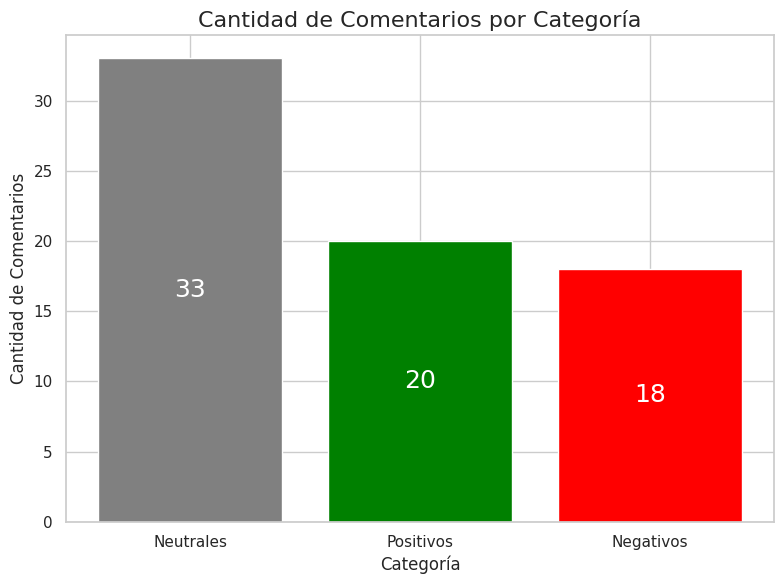

In [ ]:

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico

# Excluir la fila 'Total' del gráfico
df_to_plot = categories_df[categories_df['Categoría'] != 'Total']

# Definir los colores para cada categoría
colors = ['red' if cat == 'Negativos' else 'gray' if cat == 'Neutrales' else 'green' for cat in df_to_plot['Categoría']]

# Graficar
bars = plt.bar(df_to_plot['Categoría'], df_to_plot['Cantidad'], color=colors)

# Añadir títulos y etiquetas
plt.title('Cantidad de Comentarios por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad de Comentarios', fontsize=12)

# Mostrar los valores dentro de las barras, en el centro y con tamaño de letra grande
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval / 2, str(int(yval)), ha='center', va='center', fontsize=18, color='white')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



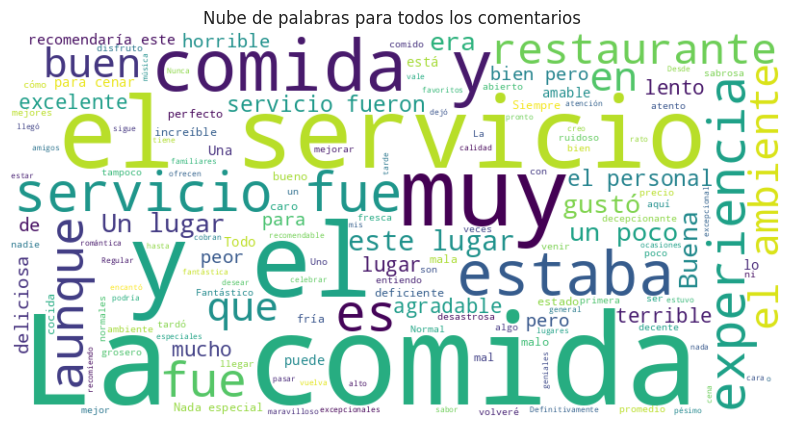

In [ ]:
# Concatenamos todos los comentarios en un solo string
all_comments = " ".join(comment for comment in df['Comentario'])

# Generamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title("Nube de palabras para todos los comentarios ")
plt.show()


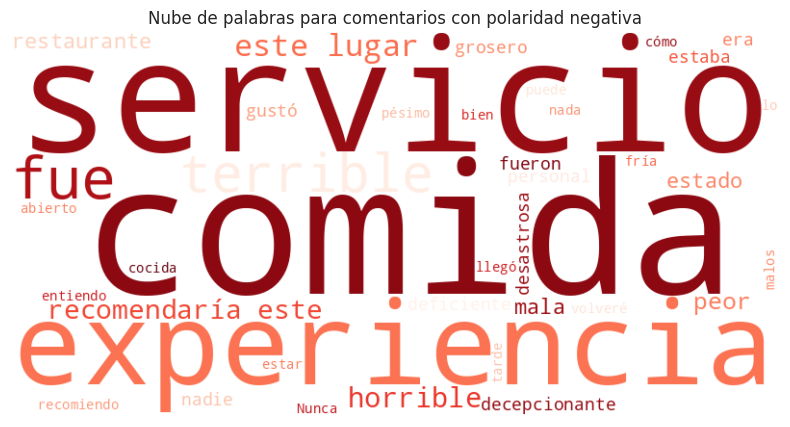

In [ ]:
#Nube de palabras solo para los comentarios con polaridad negativa

# Concatenar todos los comentarios negativos en un solo string
all_negative_comments = " ".join(comment for comment in negative_comments)

# Crear un conjunto de stopwords personalizado
stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con", "es", "un", "una", "para", "muy"})

# Generar la nube de palabras excluyendo las stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Reds').generate(all_negative_comments)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title("Nube de palabras para comentarios con polaridad negativa")
plt.show()

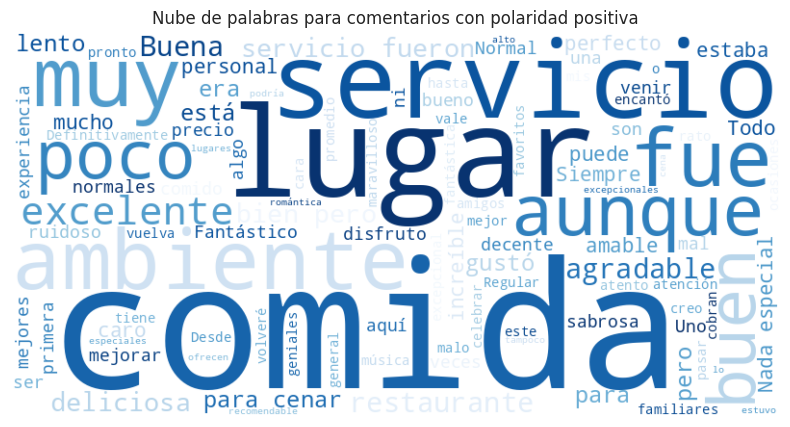

In [ ]:
#Comentarios Positivos

# Concatenar todos los comentarios positivos en un solo string
all_positive_comments = " ".join(comment for comment in positive_comments)

# Crear un conjunto de stopwords personalizado
stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con","un","es"})

# Generar la nube de palabras excluyendo las stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Blues').generate(all_positive_comments)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title("Nube de palabras para comentarios con polaridad positiva")
plt.show()

